In [1]:
import xarray as xr
import gcsfs
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import zarr
import dask.array as dsa
from importlib import reload

In [6]:
from fsspec.implementations.http import HTTPFileSystem
import fsspec
fsspec.__version__

'0.2.0+36.g555c5c8'

In [7]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)
requests_log = logging.getLogger("requests.packages.urllib3")
requests_log.setLevel(logging.DEBUG)
requests_log.propagate = True

In [9]:
from importlib import reload
from llcreader import llcmodel, stores
llcmodel = reload(llcmodel)
stores = reload(stores)

In [ ]:
# https://data.nas.nasa.gov/ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010368/Eta.0000010368.data.shrunk

In [10]:
fs = HTTPFileSystem()
base_path = 'https://data.nas.nasa.gov/ecco/download_data.php?file=/eccodata/llc_4320/compressed'
mask_path = 'https://storage.googleapis.com/pangeo-ecco/llc/masks/llc_4320_masks.zarr/'
store = stores.NestedStore(fs, base_path=base_path, mask_path=mask_path,
                           shrunk=True)
store

In [11]:
llcmodel = reload(llcmodel)
model = llcmodel.LLC4320Model(store)
ds_faces = model.get_dataset(['Theta', 'Salt', 'Eta', 'U', 'V'],
                             iter_start = 10368,
                             iter_stop = 11000)
ds_faces

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): storage.googleapis.com:443
DEBUG:urllib3.connectionpool:https://storage.googleapis.com:443 "GET /pangeo-ecco/llc/masks/llc_4320_masks.zarr/.zmetadata HTTP/1.1" 200 6930


<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 90, k_u: 90, time: 5)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    niter    (time) int64 ...
  * time     (time) datetime64[ns] 2011-09-13 ... 2011-09-13T04:00:00
Data variables:
    Theta    (time, k, face, j, i) >f4 dask.array<shape=(

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010368/Eta.0000010368.data.shrunk HTTP/1.1" 200 562551864
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (2): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010368/Eta.0000010368.data.shrunk HTTP/1.1" 206 127651500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): storage.googleapis.com:443
DEBUG:urllib3.connectionpool:https://storage.googleapis.com:443 "GET /pangeo-ecco/llc/masks/llc_4320_masks.zarr/mask_c/0.0.0.0 HTTP/1.1" 200 577673
/Users/rpa/Code/xarray/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/rpa/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/rpa/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


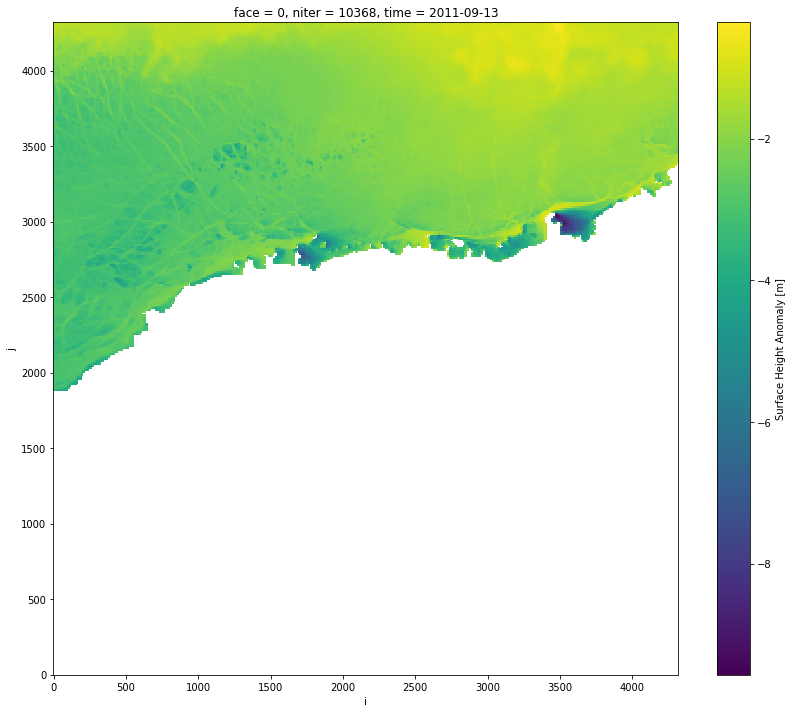

In [12]:
ds_faces.Eta[0, 0].load().coarsen(i=12, j=12).mean().plot(figsize=(14, 12))

DEBUG:urllib3.connectionpool:Resetting dropped connection: data.nas.nasa.gov
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010368/U.0000010368.data.shrunk HTTP/1.1" 200 39836455336
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (3): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010368/U.0000010368.data.shrunk HTTP/1.1" 206 127520884
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): storage.googleapis.com:443
DEBUG:urllib3.connectionpool:https://storage.googleapis.com:443 "GET /pangeo-ecco/llc/masks/llc_4320_masks.zarr/mask_w/0.0.0.0 HTTP/1.1" 200 564218


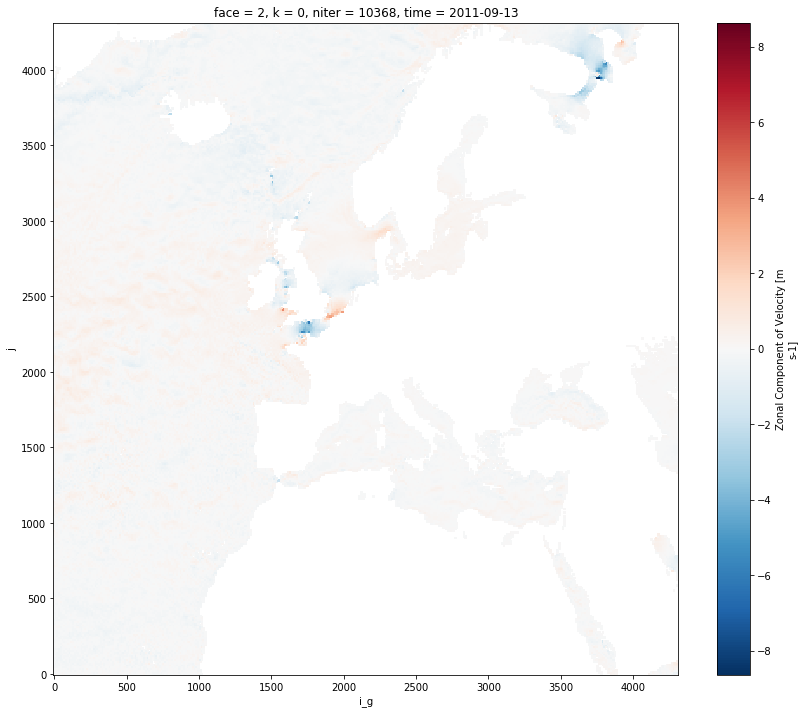

In [13]:
ds_faces.U[0, 0, 2, ::12, ::12].load().plot(figsize=(14, 12))

In [14]:
ds_ll = model.get_dataset(['Theta', 'Salt', 'Eta', 'U', 'V'],
                          type='latlon', iter_start=10368,  iter_stop=11000)
ds_ll

[('U', 'V')]


<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k: 90, k_l: 90, k_p1: 90, k_u: 90, time: 5)
Coordinates:
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2011-09-13T04:00:00
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
Data variables:
    Theta    (time, k, j, i) >f4 dask.array<shape=(5, 90, 12960, 17280), chunksize=(1, 

DEBUG:urllib3.connectionpool:Resetting dropped connection: data.nas.nasa.gov
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (4): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (5): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (6): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010512/Eta.0000010512.data.shrunk HTTP/1.1" 200 562551864
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010512/Eta.0000010512.data.shrunk HTTP/1.1" 200 562551864
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (7): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (8): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/

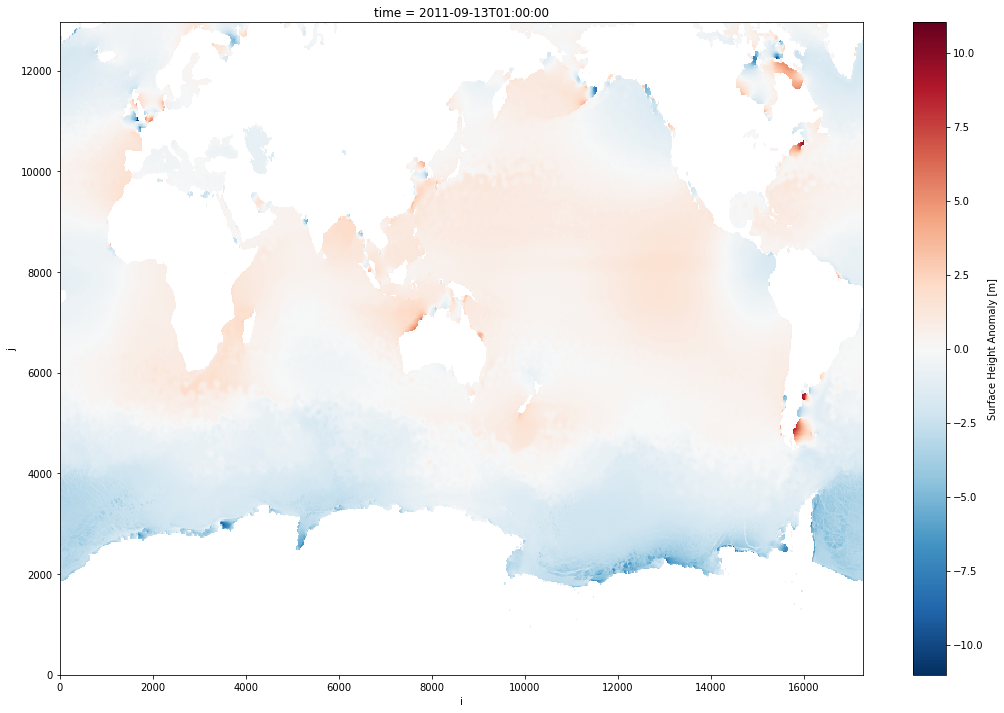

In [15]:
ds_ll.Eta[1].load().coarsen(i_g=24, j=24).mean().plot(figsize=(18, 12))

DEBUG:urllib3.connectionpool:Resetting dropped connection: data.nas.nasa.gov
DEBUG:urllib3.connectionpool:Resetting dropped connection: data.nas.nasa.gov
DEBUG:urllib3.connectionpool:Resetting dropped connection: data.nas.nasa.gov
DEBUG:urllib3.connectionpool:Resetting dropped connection: data.nas.nasa.gov
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010512/U.0000010512.data.shrunk HTTP/1.1" 200 39836455336
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010512/U.0000010512.data.shrunk HTTP/1.1" 200 39836455336
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (11): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (12): data.nas.nasa.gov:443
DEBUG:urllib3.connectionpool:https://data.nas.nasa.gov:443 "GET /ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000010512/V.0000010512.d

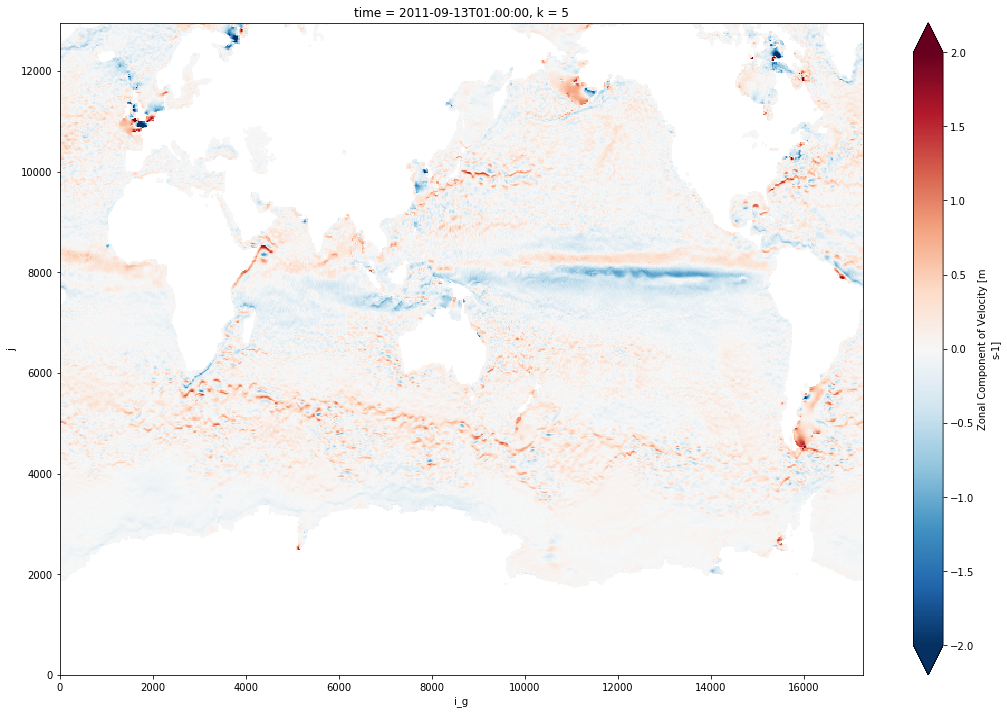

In [16]:
ds_ll.U[1, 5].load().coarsen(i_g=24, j=24).mean().plot(figsize=(18, 12), vmax=2)

In [17]:
len(ds_ll.U.data.dask)

14400